<a href="https://colab.research.google.com/github/Arshiya109/python1/blob/main/MODULE_6_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODULE 6 LAB 2

Regression Lab 2: Loss Functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

1. Regression

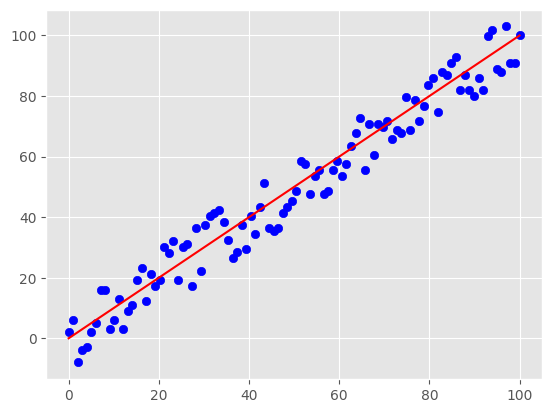

In [ ]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

In [ ]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


In [ ]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


2. Classification

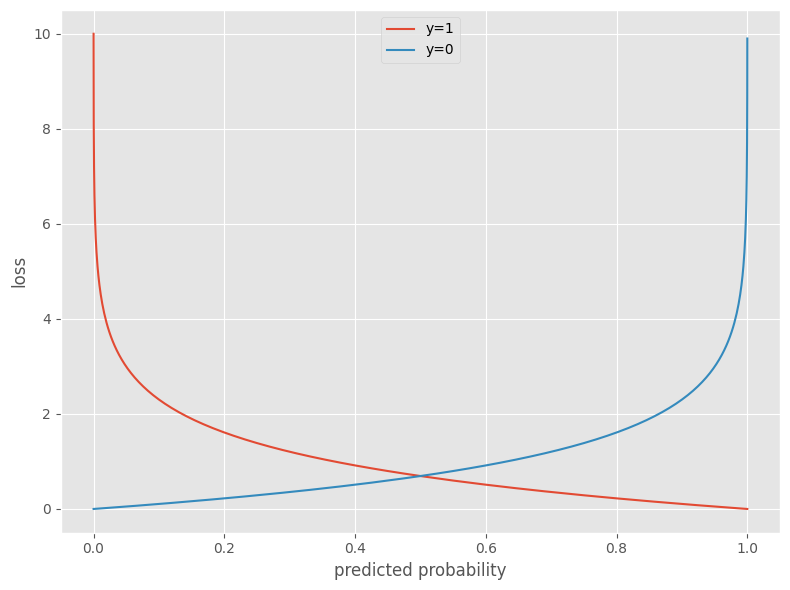

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

KNN-regression

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [ ]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

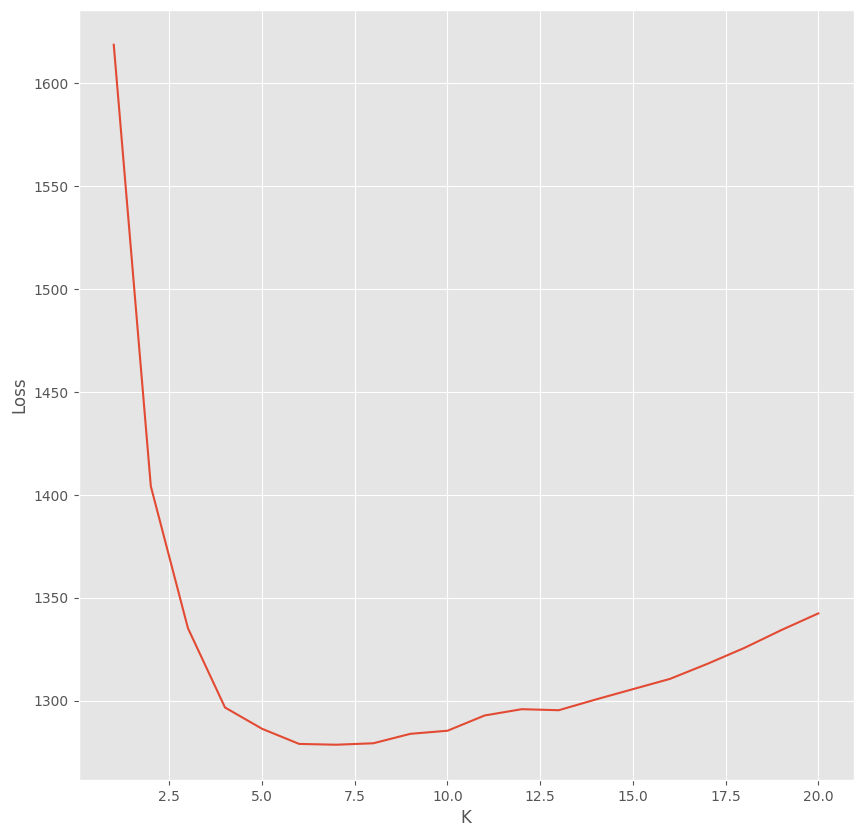

Minimum error 1278.5816281094171 is at k = 6


In [ ]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

Exercises

1)Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

2)Explore other loss functions and try to understand when and why they are used.

3)Try out KNN-regression on other datasets see which values of K give the best results.


Answer 1)

1)Mean Squared Error (MSE):

MSE penalizes larger errors heavily due to squaring the differences between predicted and actual values.
If the dataset contains outliers, MSE might lead to inflated errors and skewed model performance.
However, MSE provides a measure of how close the predictions are to the actual values on average.

2)Mean Absolute Error (MAE):

MAE is less sensitive to outliers compared to MSE since it takes the absolute differences between predicted and actual values.
It provides a more robust measure of error, especially when the dataset contains outliers.
However, MAE does not penalize large errors as heavily as MSE, potentially leading to less precise models.

3)Huber Loss:

Huber Loss combines the advantages of MSE and MAE by being less sensitive to outliers while still providing a smooth loss function that is differentiable everywhere.
It offers a compromise between robustness to outliers and sensitivity to large errors.
Huber Loss is particularly useful when the dataset contains a mix of outliers and regular data points.

4)Log-Cosh Loss:

Log-Cosh Loss is smooth and approximates MAE for small errors and MSE for larger errors.
It is less sensitive to outliers compared to MSE, making it suitable for datasets with noisy data.
Log-Cosh Loss can provide a good balance between robustness and sensitivity to errors.

Answer 2)

Loss functions are crucial as they quantify the difference between predicted and actual values, guiding the model's optimization process. Let's explore some additional loss functions commonly used in regression and understand their characteristics and applications:

1)Quantile Loss:

Definition: Quantile loss measures the discrepancy between predicted quantiles and actual quantiles of the target distribution.

Usage: Quantile regression is employed when modeling different quantiles of the target variable's distribution, providing insights into the entire distribution instead of just the mean.

Application: It's useful in scenarios where specific quantiles are of interest, such as predicting lower or upper bounds for risk assessment in finance or forecasting demand in supply chain management.

2)Pseudo-Huber Loss:

Definition: Pseudo-Huber loss is a smooth approximation to Huber loss, blending quadratic and linear behavior.

Usage: It combines the robustness of Huber loss with the smoothness required for gradient-based optimization algorithms.

Application: Pseudo-Huber loss is beneficial when dealing with noisy data containing outliers and is used in scenarios where a trade-off between robustness and smoothness is required, such as in computer vision tasks like image denoising.

3)Tukey's Biweight Loss:

Definition: Tukey's biweight loss is a robust loss function that downweights outliers more aggressively than Huber loss.

Usage: It's used when the dataset contains significant outliers and requires a loss function that can handle them effectively.

Application: Tukey's loss is commonly employed in regression tasks where robustness to outliers is critical, such as in anomaly detection or modeling financial data affected by extreme events.

4)Welsch Loss:

Definition: Welsch loss, also known as Geman-McClure loss, is another robust loss function that is more resistant to outliers than Huber loss.

Usage: It's utilized in situations where data contamination by outliers is substantial and requires a loss function with heavier tails.

Application: Welsch loss finds applications in computer vision tasks like image registration and stereo matching, where robustness to outliers is paramount for accurate estimation.

5)Fair Loss:

Definition: Fair loss, also called Tukey's loss, is a robust loss function suitable for asymmetric errors.

Usage: It penalizes positive and negative errors differently, making it useful when modeling asymmetric loss scenarios.

Application: Fair loss is commonly employed in areas like insurance pricing, where asymmetric consequences arise from overestimation or underestimation of risks.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to explore
k_values = range(1, 21)  # Try k values from 1 to 20

# Initialize lists to store results
mse_values = []

# Iterate over different values of k
for k in k_values:
    # Initialize and fit KNN regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_regressor.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Find the best value of k that minimizes MSE
best_k = k_values[np.argmin(mse_values)]
best_mse = np.min(mse_values)

print(f"Best value of k: {best_k}")
print(f"Corresponding MSE: {best_mse}")


Best value of k: 9
Corresponding MSE: 1.103251681789815
